In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [24]:
df = pd.read_csv("top50.csv", encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [25]:
print(df.isnull().sum())

Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64


In [26]:
En = LabelEncoder()
df['Genre_En'] = En.fit_transform(df['Genre'])
df['Genre_En']


0      6
1     19
2      8
3     15
4      9
5     15
6     20
7     15
8      7
9     11
10    18
11     8
12    15
13    14
14     5
15     8
16    13
17     9
18     5
19    12
20    16
21     7
22    19
23    13
24    11
25     6
26     1
27     5
28    13
29    13
30    10
31     8
32    18
33     0
34     8
35     2
36    14
37    15
38     3
39     8
40    10
41     8
42     8
43    15
44    17
45     4
46    13
47     4
48    10
49    15
Name: Genre_En, dtype: int64

In [27]:
df['target'] = df['Popularity'] > 85
features = [ 'Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..',
    'Liveness', 'Valence.', 'Acousticness..', 'Speechiness.', 'Length.',
    'Genre_En']


In [28]:
x = df[features] 
y = df['target']
y

0     False
1      True
2     False
3      True
4      True
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15    False
16     True
17     True
18     True
19     True
20     True
21     True
22    False
23     True
24     True
25    False
26    False
27     True
28     True
29     True
30    False
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38    False
39    False
40     True
41     True
42     True
43    False
44     True
45     True
46     True
47     True
48     True
49    False
Name: target, dtype: bool

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40, 10), (10, 10), (40,), (10,))

In [30]:
model = RandomForestClassifier(n_estimators=100, random_state= 42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = model.predict(x_test)

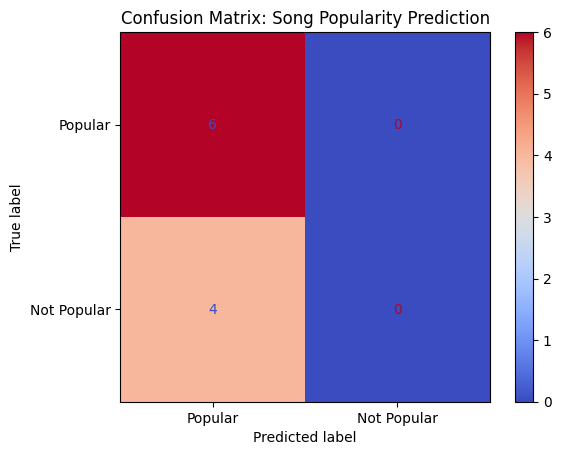

array([[6, 0],
       [4, 0]])

In [39]:
conf = confusion_matrix(y_test, y_pred, labels = [True, False])
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=["Popular", "Not Popular"])
disp.plot(cmap='coolwarm')
plt.title("Confusion Matrix: Song Popularity Prediction")
plt.show()
conf

In [38]:
recall = recall_score(y_test, y_pred, pos_label = True)
precision = precision_score(y_test, y_pred, pos_label = True)
f1 = f1_score(y_test, y_pred, pos_label = True) 
acc = accuracy_score(y_test, y_pred)
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {acc:.3f}")


Recall: 1.000
Precision: 0.600
F1 Score: 0.750
Accuracy: 0.600
